# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210512_batch_OLSmonths.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [16]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
from matplotlib import pyplot

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


## Functions

In [17]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):

    if HEX.shape == (112, 3):
        print(HEX.shape,": Shape is correct.")
    else:
        print(HEX.shape,": Shape is **INCORRECT!**")

    if HEX["CODIGO MUNICIPIO"].nunique() == 112:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is correct.")
    else:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is **INCORRECT!**")
        
    if any(HEX["NIDOS 2020"] < 0):
        print("**INCORRECT!** At least one municipality has NESTS <= 0.")
    else:
        print("Great! All municipalities have NESTS >= 0.")
    
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

## Get the data

In [18]:
QUEEN_train = pd.read_csv('../Feeder_months/WBds03_QUEENtrainMONTHS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_months/WBds03_QUEENpredictMONTHS.csv', sep=',')

clustersMario = pd.read_csv("../Feeder_years/WBds_CLUSTERSnests.csv")

In [19]:
#QUEEN_predict.isnull().sum()

In [20]:
QUEEN_train.shape

(2688, 43)

In [21]:
QUEEN_predict.shape

(1344, 43)

## Caracterize in clusters

In [23]:
QUEEN_train = pd.merge(QUEEN_train, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])

In [24]:
QUEEN_train.shape

(2688, 44)

In [25]:
QUEEN_predict.shape

(1344, 44)

In [26]:
QUEEN_train.isnull().sum()

municip_name              0
municip_code              0
month                     0
year_offset               0
NESTS                     0
colonies_amount           0
food_fruit                0
food_apple                0
food_txakoli              0
food_kiwi                 0
food_pear                 0
food_blueberry            0
food_raspberry            0
station_code              0
station_name              0
weath_days_frost          0
weath_humidity            0
weath_maxLevel            0
weath_midLevel            0
weath_minLevel            0
weath_days_rain           0
weath_days_rain1mm        0
weath_accuRainfall        0
weath_10minRainfall       0
weath_1dayRainfall        0
weath_solar               0
weath_meanTemp            0
weath_maxTemp             0
weath_maxMeanTemp         0
weath_minTemp             0
weath_meanWindM           0
weath_maxWindM            0
weath_meanDayMaxWind      0
year                      0
population                0
cluster_size        

In [27]:
QUEEN_predict.isnull().sum()

municip_name              0
municip_code              0
month                     0
year_offset               0
NESTS                     0
colonies_amount           0
food_fruit                0
food_apple                0
food_txakoli              0
food_kiwi                 0
food_pear                 0
food_blueberry            0
food_raspberry            0
station_code              0
station_name              0
weath_days_frost          0
weath_humidity            0
weath_maxLevel            0
weath_midLevel            0
weath_minLevel            0
weath_days_rain           0
weath_days_rain1mm        0
weath_accuRainfall        0
weath_10minRainfall       0
weath_1dayRainfall        0
weath_solar               0
weath_meanTemp            0
weath_maxTemp             0
weath_maxMeanTemp         0
weath_minTemp             0
weath_meanWindM           0
weath_maxWindM            0
weath_meanDayMaxWind      0
year                      0
population                0
cluster_size        

## Determine feature importance

In [256]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code', 'station_name', 'year'])

In [257]:
y = QUEEN_train['NESTS']

In [258]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [259]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: month, Score: 1.50430
Feature: year_offset, Score: -1.71620
Feature: colonies_amount, Score: -0.00777
Feature: food_fruit, Score: 4.53189
Feature: food_apple, Score: -2.23837
Feature: food_txakoli, Score: 2.07314
Feature: food_kiwi, Score: -1.39543
Feature: food_pear, Score: -1.36268
Feature: food_blueberry, Score: 1.33340
Feature: food_raspberry, Score: 0.19340
Feature: weath_days_frost, Score: -0.38944
Feature: weath_humidity, Score: 1.52093
Feature: weath_maxLevel, Score: -0.84793
Feature: weath_midLevel, Score: 2.84264
Feature: weath_minLevel, Score: 0.89802
Feature: weath_days_rain, Score: -0.76892
Feature: weath_days_rain1mm, Score: -0.45304
Feature: weath_accuRainfall, Score: 1.33040
Feature: weath_10minRainfall, Score: -1.51007
Feature: weath_1dayRainfall, Score: -0.40241
Feature: weath_solar, Score: 0.00947
Feature: weath_meanTemp, Score: -16.44949
Feature: weath_maxTemp, Score: 1.28507
Feature: weath_maxMeanTemp, Score: 3.13410
Feature: weath_minTemp, Score: 17.05640

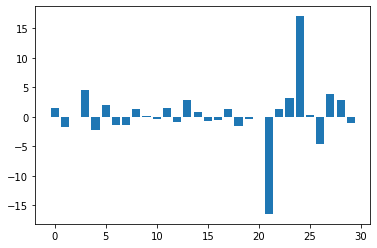

In [260]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [261]:
for i,v in enumerate(importance):
    if abs(v) > 3:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: food_fruit, Score: 4.53
Feature: weath_meanTemp, Score: -16.45
Feature: weath_maxMeanTemp, Score: 3.13
Feature: weath_minTemp, Score: 17.06
Feature: weath_maxWindM, Score: -4.58
Feature: weath_meanDayMaxWind, Score: 3.91


## Train the model

### With the variables suggested by the Feature Importance method

In [262]:
model = ols('NESTS ~ food_fruit + weath_maxMeanTemp + weath_minTemp + weath_meanDayMaxWind + weath_meanTemp + weath_maxWindM',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     52.92
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.02e-62
Time:                        00:43:30   Log-Likelihood:                -7165.3
No. Observations:                2688   AIC:                         1.434e+04
Df Residuals:                    2681   BIC:                         1.439e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6361 

### Backward elimination

In [263]:
model = ols('NESTS ~ food_fruit + weath_maxMeanTemp + weath_minTemp + weath_meanTemp',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     79.25
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.23e-63
Time:                        00:43:30   Log-Likelihood:                -7165.7
No. Observations:                2688   AIC:                         1.434e+04
Df Residuals:                    2683   BIC:                         1.437e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7889      0.33

### With the Cluster Categorical

In [264]:
model = ols('NESTS ~ food_fruit + weath_maxMeanTemp + weath_minTemp + weath_meanTemp + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     123.0
Date:                Wed, 26 May 2021   Prob (F-statistic):          7.94e-176
Time:                        00:43:30   Log-Likelihood:                -6895.3
No. Observations:                2688   AIC:                         1.381e+04
Df Residuals:                    2679   BIC:                         1.386e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1929      0.31

In [265]:
## With both the Cluster and Month categorical variables

In [266]:
model = ols('NESTS ~ food_fruit + weath_maxMeanTemp + weath_minTemp + weath_meanTemp + C(Cluster) + C(month)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     64.79
Date:                Wed, 26 May 2021   Prob (F-statistic):          2.76e-203
Time:                        00:43:30   Log-Likelihood:                -6805.9
No. Observations:                2688   AIC:                         1.365e+04
Df Residuals:                    2668   BIC:                         1.377e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1651      0.40

## Predict 2020's nests

In [267]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0       0.349691
1      -0.167459
2      -0.248094
3       0.263748
4       0.638197
          ...   
1339    2.642811
1340    2.496458
1341    2.617280
1342    1.793487
1343   -0.204260
Length: 1344, dtype: float64

In [268]:
# Any municipality/month resulting in NESTS<0 is equivalent to = 0

y_2020[y_2020 < 0] = 0
y_2020

0       0.349691
1       0.000000
2       0.000000
3       0.263748
4       0.638197
          ...   
1339    2.642811
1340    2.496458
1341    2.617280
1342    1.793487
1343    0.000000
Length: 1344, dtype: float64

In [269]:
QUEEN_predict['NESTS'] = y_2020

In [270]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','NESTS']].groupby(by=['municip_code','municip_name'], as_index=False).sum()

## Manual adjustments

In [271]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), 'NESTS'] = 0

In [272]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,0.0
70,48071,Muskiz,0.0
73,48074,Urduña/Orduña,0.0
87,48088,Ubide,0.0


In [273]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

## Verify dataset format

In [274]:
check_data(HEX)

(112, 3) : Shape is correct.
112 : Number of unique municipalities is correct.
Great! All municipalities have NESTS >= 0.
The Total 2020 Nests' Prediction is 2914


## Export dataset for submission

In [275]:
HEX.to_csv('WaspBusters_20210526_OLSmonths.csv', index=False)